In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_power_lines(power):

    xlims = plt.gca().get_xlim()
    ylims = plt.gca().get_ylim()
    log_x_range = np.log(xlims)
    initital_value = np.linspace(np.log(ylims[0])- power * (log_x_range[1] - log_x_range[0]), np.log(ylims[1]) , 20) if power > 0 else np.linspace(np.log(ylims[0]), np.log(ylims[1])- power * (log_x_range[1] - log_x_range[0]), 20)

    for log_y0 in initital_value:
        plt.plot(np.exp(log_x_range), np.exp(log_y0 + power * (log_x_range - log_x_range[0])), ':', color='black', alpha=0.15)

    plt.xlim(xlims)
    plt.ylim(ylims)


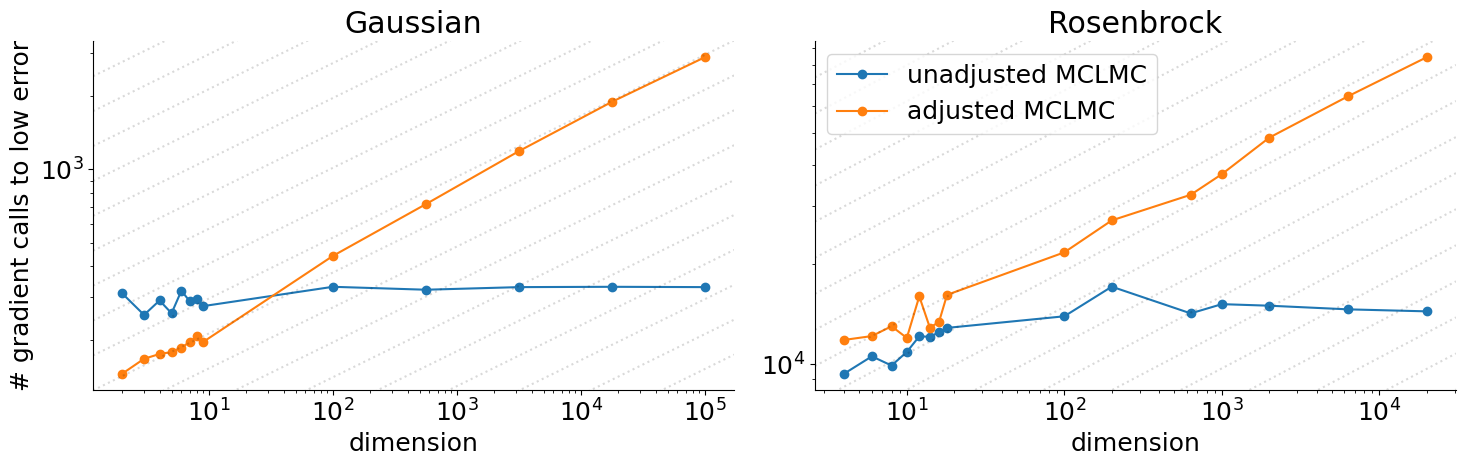

In [ ]:
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size'] = 18


def gett(method_name, model_name, dim):
    folder = 'sampler-comparison/sampler_comparison/experiments/dimensional_scaling/results/tuned/' + model_name + '/'

    name = method_name + '_velocity_verlet_'+model_name+'_' + str(dim) + '.csv'
    df = pd.read_csv(folder + name)
    return df[~df['max'] & (df['statistic'] == 'x2')]['num_grads_to_low_error'].item()


models = [('Gaussian', [2, 3, 4, 5, 6, 7, 8, 9, 100, 563, 3163, 17783, 100000]),
          ('Rosenbrock', [4, 6, 8, 10, 12, 14, 16, 18, 100, 200, 634, 1000, 2000, 6326, 20000])]

plt.figure(figsize = (15, 5))
num_plot = 1

for model_name, dims in models:
    
    plt.subplot(1, 2, num_plot)
    plt.gca().spines[['right', 'top']].set_visible(False)
    plt.title(model_name)
    
    umclmc = [gett('unadjusted_microcanonical_', model_name, dim) for dim in dims]
    amclmc = [gett('adjusted_microcanonical', model_name, dim) for dim in dims]

    plt.plot(dims, umclmc, 'o-', label='unadjusted MCLMC', color='tab:blue')
    plt.plot(dims, amclmc, 'o-', label='adjusted MCLMC', color='tab:orange')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('dimension')

    if num_plot == 1:
        plt.ylabel('# gradient calls to low error')
    else:
        plt.legend()
    plot_power_lines(0.25)

    num_plot += 1

plt.tight_layout()
plt.savefig('scaling.pdf', dpi = 400)
plt.show()

In [ ]:
import os
import re

folder = 'sampler-comparison/sampler_comparison/experiments/dimensional_scaling/results/tuned/Rosenbrock/'

d = []

for file in os.listdir(folder):
    reg = r'unadjusted_microcanonical__velocity_verlet_Rosenbrock_[0-9]+.csv'
    if re.match(reg, file):
        #print(file)
        d.append(int(file[54:-4]))

print(np.sort(d).tolist())